# "Prezzi e rendimenti con Pandas"
> "Scrivere direttamente un *post* attraverso un *notebook* di `Jupyter`"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [jupyter, pandas, finanza]
- image: images/2021-05-06-prezzi-e-rendimenti-con-pandas.png
- hide: false

Uno dei vantaggi di [Nikola](https://getnikola.com/), lo *static site generator* che alimenta questo mio blog, è che permette di integrare direttamente dei *notebook* di `Jupyter` nei post. Per provare questa funzionalità, costruiamo un breve *notebook* su come gestire prezzi e rendimenti delle azioni con `Pandas`, in alternativa a Excel. In questo modo, potremo osservare in azione alcuni degli strumenti che ho descritto in un mio [post](../python-per-la-finanza/index.html) precedente.
<!-- TEASER_END -->

In [1]:
# Importiamo alcuni moduli che ci servono per il lavoro
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # Modulo per lo scarico dei dati da Yahoo! Finance

# Impostiamo uno stile dei grafici più elegante del default (secondo me!)
plt.style.use('seaborn-darkgrid')

Scarichiamo da Yahoo! Finance i prezzi di quattro azioni statunitensi, identificate attraverso i loro *ticker*: **Apple** (AAPL), **Microsoft** (MSFT), **McDonald's** (MCD) e **Coca-Cola** (KO). Due azioni della *new economy* e due della *old*, come si diceva qualche anno fa.

In [2]:
tickers = 'AAPL MSFT MCD KO'
data = yf.download(tickers=tickers, period='2y')

[*********************100%***********************]  4 of 4 completed


A questo punto, eliminiamo dal database che abbiamo costruito i prezzi *open*, *high*, *low* e il volume negoziato per tenerci solo i prezzi di chiusura, rettificati dei dividendi eventualmente distribuiti e delle *corporate action*.

In [3]:
# La funzione 'xs' estrae da una tabella multi-indice una singola categoria
prices = data.xs('Adj Close', axis=1, level=0)
# Vediamo gli ultimi dati così costruiti, per controllare che tutto sia corretto!
prices.tail()

,AAPL,KO,MCD,MSFT
Date,,,,
2021-06-16,130.149994,54.669998,235.580002,257.380005
2021-06-17,131.789993,54.950001,233.880005,260.899994
2021-06-18,130.460007,53.770000,229.619995,259.429993
2021-06-21,132.300003,54.360001,232.899994,262.630005
2021-06-22,133.979996,54.560001,233.880005,265.510010


Possiamo fare un primo grafico dell'andamento dei prezzi delle quattro azioni negli ultimi due anni.

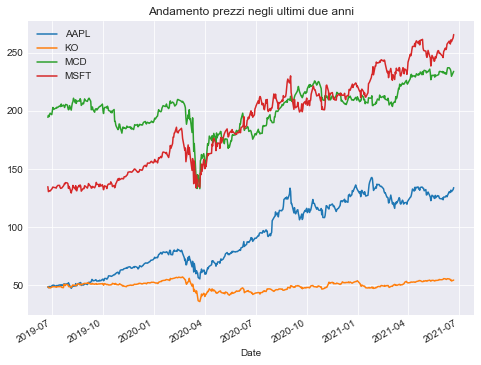

In [4]:
# Pandas incorpora una funzione 'plot' che consente di fare direttamente grafici di una tabella appoggiandosi a matplotlib
prices.plot(figsize=(8, 6), title='Andamento prezzi negli ultimi due anni');

Per avere la possibilità di confrontare i quattro grafici, ribasiamo i dati facendo partire gli andamenti da quota 100.

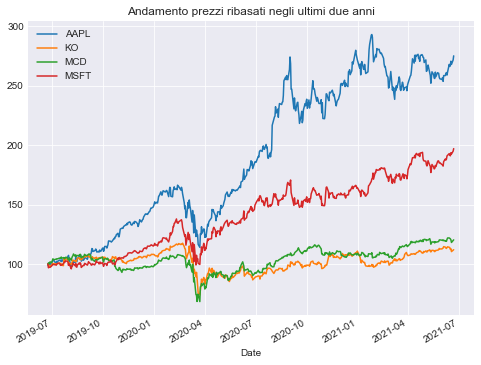

In [5]:
# Dividiamo semplicemente tutti i prezzi della tabella per il primo di ogni serie e moltiplichiamo per 100
rebased_prices = prices.div(prices.iloc[0, :]).mul(100)
rebased_prices.plot(figsize=(8, 6), title='Andamento prezzi ribasati negli ultimi due anni');

Passiamo ora ai rendimenti e calcoliamo i rendimenti mensili delle quattro azioni.

In [6]:
# 'Resample' consente di ridefinire la frequenza di una serie storica applicando una funzione (in questo caso 'last', l'ultimo valore di ogni mese) per poi calcolare il rendimento percentuale con la funzione 'pct_change'
monthly_returns = prices.resample('M').last().pct_change()

Possiamo fare un grafico a barre dei rendimenti appena calcolati.

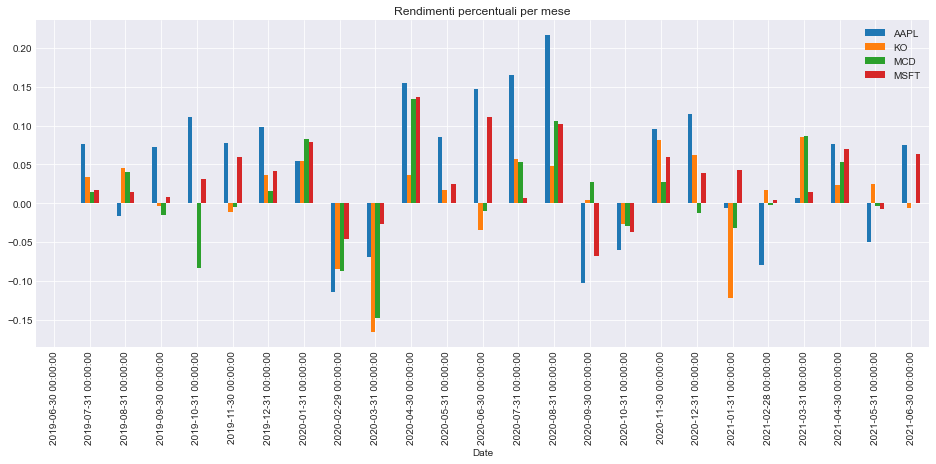

In [7]:
# La funzione 'plot' disegna di default dei grafici a linea, ma si possono indicare altre tipologie come i grafici a barre in questo caso
monthly_returns.plot.bar(figsize=(16, 6), title='Rendimenti percentuali per mese');

Possiamo facilmente invertire gli assi dei grafici (e notiamo come **Apple** sia stato il titolo più volatile negli ultimi due anni, ma **Coca-Cola** e **McDonald's** abbiano avuto i maggiori *drawdown*).

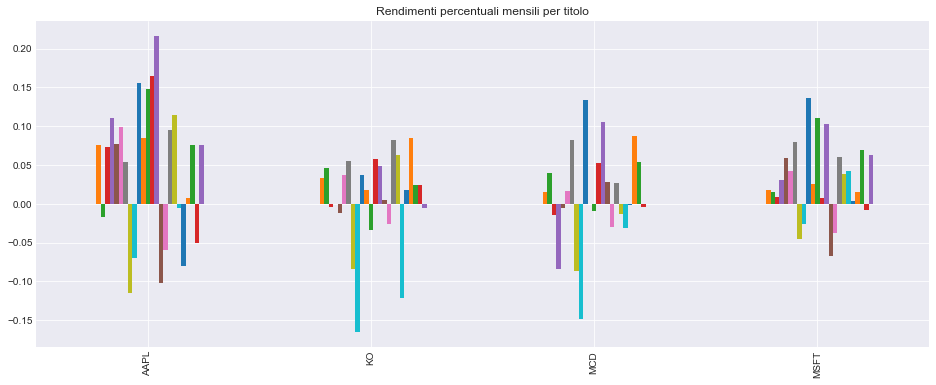

In [8]:
# 'T' traspone una tabella di Pandas, invertendo gli assi
monthly_returns.T.plot.bar(figsize=(16, 6), title='Rendimenti percentuali mensili per titolo', legend=False);

Meglio ancora, possiamo separare graficamente i rendimenti mensili delle quattro azioni.

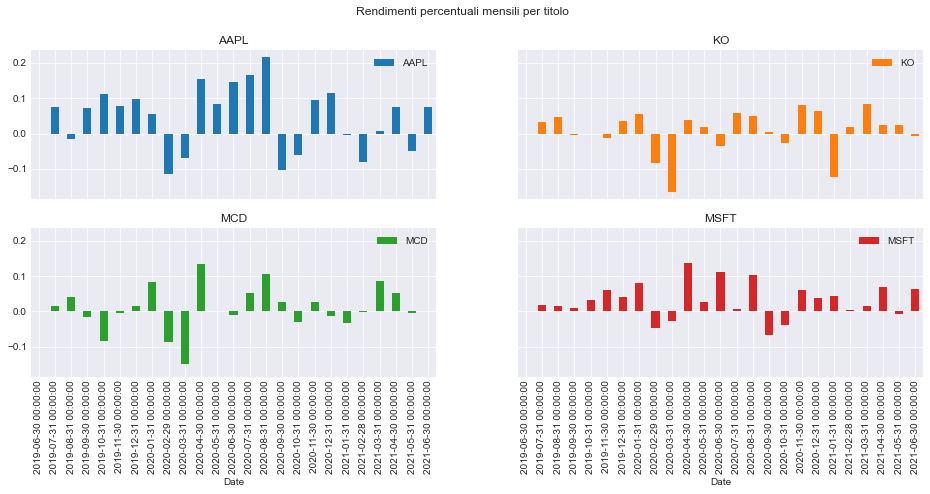

In [9]:
# Il parametro 'subplots' genera dei sottografici secondo lo schema dettagliato in 'layout', mentre 'sharey' unifica le assi Y per facilitare i confronti
monthly_returns.plot.bar(figsize=(16, 6), title='Rendimenti percentuali mensili per titolo', subplots=True, layout=(2,2), sharey=True);

In sintesi, la prova può dirsi perfettamente riuscita e mostra le potenzialità di analisi esplorativa dei dati di Pandas, in grado in poche righe di codice di scaricare, elaborare e visualizzare le serie storiche con grande facilità.